In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score
import pandas as pd
import seaborn as sns
from statsmodels import api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
import numpy as np
import math
import validate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [94]:
df = pd.read_csv( os.path.join('fixed_csv_label', 'learning_data_10.csv') )
df=df[df['day']<=9]
df

,original,label,time,day
0,53.4,0,15,0
1,52.8,0,15,0
2,52.8,0,15,0
3,53.2,0,15,0
4,53.6,0,15,0
...,...,...,...,...
3995345,45.9,0,5,9
3995346,45.6,0,5,9
3995347,45.8,0,5,9
3995348,45.7,0,5,9


In [95]:
## smoothing
for i in set(df['day']):
    df.loc[df['day']==i, 'smooth']=df.loc[df['day']==i, 'original'].rolling(2, min_periods=0).mean()
df

,original,label,time,day,smooth
0,53.4,0,15,0,53.40
1,52.8,0,15,0,53.10
2,52.8,0,15,0,52.80
3,53.2,0,15,0,53.00
4,53.6,0,15,0,53.40
...,...,...,...,...,...
3995345,45.9,0,5,9,45.75
3995346,45.6,0,5,9,45.75
3995347,45.8,0,5,9,45.70
3995348,45.7,0,5,9,45.75


In [96]:
def make_data(x, str,w):
    x=pd.DataFrame(x)
    window=w
    for i in range(1, window):
        column=f'{str}_lag{i}'
        x[column]=x[str].shift(i)
    return x

def make_label(x, w):
    window=w
    x['label_all']=x['label']
    for i in range(1, window):
        x.loc[(x['label_all']==1)|(x['label'].shift(i)==1), 'label_all']=1
        x.loc[(x['label_all']==0)&(x['label'].shift(i)==0), 'label_all']=0
    
    x['label']=x['label_all']
    return x[['label']]

df_list=[]
for i in set(df['day']):
    lag=[] 
    window=20
    lag.append(make_data(df.loc[df['day']==i, ['smooth']], 'smooth', window))
    lag.append(df.loc[df['day']==i, ['day']])
    lag.append(make_label(df.loc[df['day']==i, ['label']], window))
    df_add_lag=pd.concat(lag, axis=1)
    df_list.append(df_add_lag)
tmp=pd.concat(df_list)
tmp=tmp.dropna().reset_index(drop=True)
tmp

,smooth,smooth_lag1,smooth_lag2,smooth_lag3,smooth_lag4,smooth_lag5,smooth_lag6,smooth_lag7,smooth_lag8,smooth_lag9,...,smooth_lag12,smooth_lag13,smooth_lag14,smooth_lag15,smooth_lag16,smooth_lag17,smooth_lag18,smooth_lag19,day,label
0,55.10,55.00,54.95,54.90,54.90,54.95,55.35,55.75,55.70,55.65,...,55.20,54.35,53.80,53.40,53.00,52.80,53.10,53.40,0,0
1,54.95,55.10,55.00,54.95,54.90,54.90,54.95,55.35,55.75,55.70,...,55.60,55.20,54.35,53.80,53.40,53.00,52.80,53.10,0,0
2,54.55,54.95,55.10,55.00,54.95,54.90,54.90,54.95,55.35,55.75,...,55.60,55.60,55.20,54.35,53.80,53.40,53.00,52.80,0,0
3,54.45,54.55,54.95,55.10,55.00,54.95,54.90,54.90,54.95,55.35,...,55.65,55.60,55.60,55.20,54.35,53.80,53.40,53.00,0,0
4,54.40,54.45,54.55,54.95,55.10,55.00,54.95,54.90,54.90,54.95,...,55.70,55.65,55.60,55.60,55.20,54.35,53.80,53.40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995155,45.75,45.50,45.65,45.95,45.85,45.55,45.45,45.65,45.85,45.65,...,45.70,45.55,45.45,45.55,45.60,45.60,45.45,45.40,9,0
3995156,45.75,45.75,45.50,45.65,45.95,45.85,45.55,45.45,45.65,45.85,...,45.75,45.70,45.55,45.45,45.55,45.60,45.60,45.45,9,0
3995157,45.70,45.75,45.75,45.50,45.65,45.95,45.85,45.55,45.45,45.65,...,45.60,45.75,45.70,45.55,45.45,45.55,45.60,45.60,9,0
3995158,45.75,45.70,45.75,45.75,45.50,45.65,45.95,45.85,45.55,45.45,...,45.65,45.60,45.75,45.70,45.55,45.45,45.55,45.60,9,0


In [97]:
##主成分分析（次元削減）
pca=PCA(n_components=4)
pca.fit(tmp[tmp.columns[:-2]])
data=pca.transform(tmp[tmp.columns[:-2]])
data=pd.DataFrame(data)
df=pd.concat([data, tmp['day'], tmp['label'], tmp['smooth']], axis=1)
df.rename(columns={'smooth':'original'}, inplace=True)
df

,0,1,2,3,day,label,original
0,12.862157,-3.093080,2.493890,0.009406,0,0,55.10
1,13.214140,-2.655789,2.708934,-0.995047,0,0,54.95
2,13.541127,-1.911873,2.681933,-1.553137,0,0,54.55
3,13.906171,-0.975276,2.298412,-1.634343,0,0,54.45
4,14.211606,-0.051249,1.737065,-1.388640,0,0,54.40
...,...,...,...,...,...,...,...
3995155,-27.417153,-0.316017,0.569341,-0.045886,9,0,45.75
3995156,-27.339864,-0.270265,0.522584,-0.043983,9,0,45.75
3995157,-27.284453,-0.216030,0.499512,-0.034696,9,0,45.70
3995158,-27.250745,-0.224882,0.503685,-0.070690,9,0,45.75


In [98]:
test_day=[0]
train=df[(df['label']==0)&(~df['day'].isin(test_day))][df.columns[:-3]]
test=df[(df['day'].isin(test_day))][df.columns[:-3]]

In [99]:
nk = 10
neigh = NearestNeighbors(n_neighbors=nk)
neigh.fit(train)
d = neigh.kneighbors(test)[0]

d = np.mean(d, axis=1)
mx = np.max(d)
d = d / mx

## 独自評価関数

In [100]:
anorm=(d*10)**2
thr=np.sort(anorm)[::-1][1300]
test_v=df.loc[df['day'].isin(test_day), ['original', 'label']]
validate.validate(test_v, anorm, thr)

適合率：0.797848
再現率：0.750000


In [102]:
d.min()

0.0011368898264775553

In [104]:
d.max()

1.0

## 独自グラフ描画関数

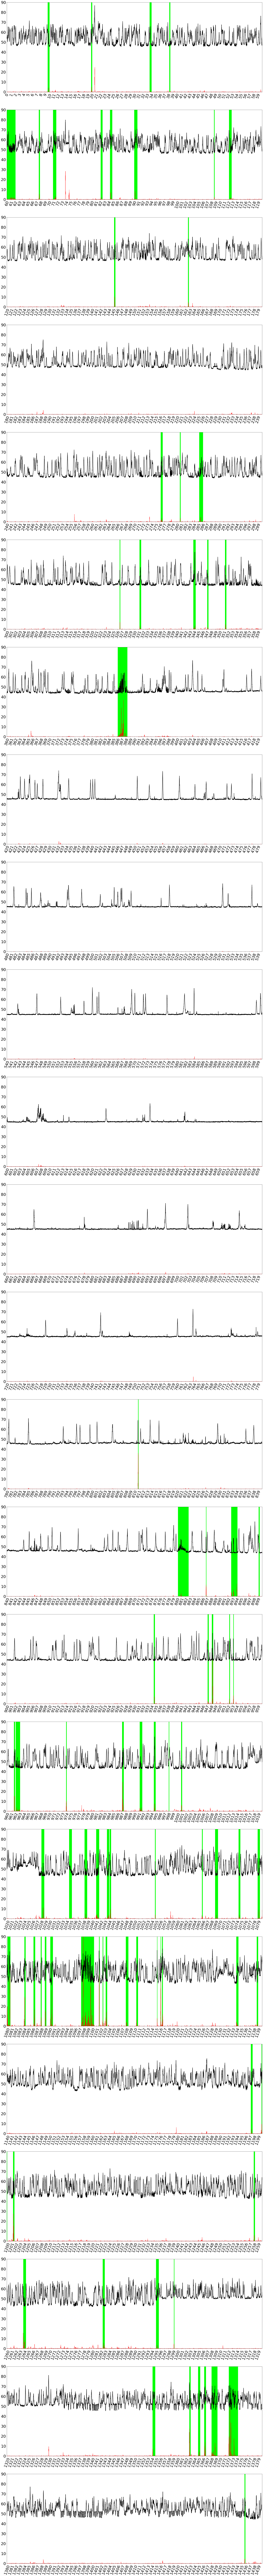

In [101]:
validate.figure(test_v, anorm)